In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as utils
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import time
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch.optim import lr_scheduler
from torchsummary import summary

In [2]:
device = torch.device('cuda')

In [3]:
# train data augmentation : 1) 데이터 좌우반전(2배). 2) size 4만큼 패딩 후 32의 크기로 random cropping
transforms_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        #transforms.RandomCrop(32, padding=4),  
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])
transforms_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])   #평균값은 미리 구해놓은 값

In [4]:
train_val_data = datasets.CIFAR10(root='./dataset/', train=True, transform=transforms_train, download=True)
train_data, val_data = torch.utils.data.random_split(train_val_data, [40000,10000])
test_data = datasets.CIFAR10(root="./dataset/", train=False, transform=transforms_test, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The 1st image:
tensor([[[-1.7118, -1.6731, -1.6924,  ..., -1.1690, -1.4211, -1.2854],
         [-1.8669, -1.6537, -1.5567,  ..., -1.3823, -1.1690, -1.0527],
         [-1.6343, -1.7118, -1.4986,  ..., -1.2854, -1.0915, -0.9364],
         ...,
         [ 0.4205,  0.5756,  0.7307,  ...,  1.1959,  1.3122,  1.1765],
         [ 0.5368,  0.6338,  0.7694,  ...,  1.0990,  1.1184,  0.9245],
         [ 0.5368,  0.7113,  0.7888,  ...,  1.0796,  0.8858,  0.7501]],

        [[-1.6709, -1.5922, -1.5922,  ..., -0.9432, -1.2186, -1.1006],
         [-1.7889, -1.5529, -1.4349,  ..., -1.2382, -0.9629, -0.8252],
         [-1.4939, -1.5529, -1.3169,  ..., -1.1792, -0.8646, -0.6482],
         ...,
         [ 1.0824,  1.1808,  1.2988,  ...,  1.8101,  1.9871,  1.9281],
         [ 1.2004,  1.2398,  1.3381,  ...,  1.7708,  1.8495,  1.7118],
         [ 1.2004,  1.2988,  1.3774,  ...,  1.7118,  1.5741,  1.5151]],

        [[-1.0898, -1.1873, -1.3239,  ..., -1.2069, -1.5385, -1.3434],
         [-1.3434, -1.2459, -1

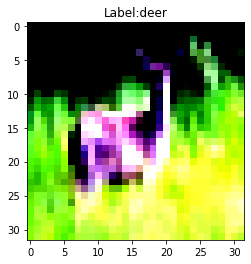

In [6]:
image, label = train_data[0]
print("The 1st image:")
print(image)
print('Shape of this image\t:', image.shape)
plt.imshow(np.transpose(image, (1, 2, 0)))
plt.title('Label:%s' % classes[label])
plt.show()


In [7]:
#(in_channels: int, out_channels: int, kernel_size: _size_2_t, stride: _size_2_t = 1, 
# padding: _size_2_t | str = 0, dilation: _size_2_t = 1, groups: int = 1, bias: bool = True,
# padding_mode: str = 'zeros', device=None, dtype=None) -> None
#Initializes internal Module state, shared by both nn.Module and ScriptModule.

#(kernel_size: _size_any_t, stride: _size_any_t | None = None, padding: _size_any_t = 0, dilation: _size_any_t = 1, 
# return_indices: bool = False, ceil_mode: bool = False) -> None
#Initializes internal Module state, shared by both nn.Module and ScriptModule.

class LeNet5_model(nn.Module):
    def __init__(self):
        super(LeNet5_model,self).__init__()
        #(3,32,32)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride = 1, padding= 0)
        #(6,28,28)
        self.pooling1 = nn.MaxPool2d(kernel_size = 2, stride= 2)
        #(6,14,14)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride = 1, padding= 0)
        #(16,10,10)
        self.pooling2 = nn.MaxPool2d(kernel_size = 2, stride= 2)
        #(16,5,5)
        self.fc_out1 = nn.Linear(400,128)
        self.fc_out2 = nn.Linear(128,10)         
    
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pooling1(x)
        x = F.relu(self.conv2(x))
        x = self.pooling2(x)
        x = x.view(-1,400)
        x = F.relu(self.fc_out1(x))
        x = self.fc_out2(x)
        return x
        
model = LeNet5_model()
print(model)

LeNet5_model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_out1): Linear(in_features=400, out_features=128, bias=True)
  (fc_out2): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
a = torch.empty(16,5,5)
a = a.view(-1,400)
a.shape

torch.Size([1, 400])

In [9]:
model.to(device)

LeNet5_model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_out1): Linear(in_features=400, out_features=128, bias=True)
  (fc_out2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
batch_size = 128
train_batch_loader = DataLoader(train_data, batch_size, shuffle=True)
val_batch_loader = DataLoader(val_data, batch_size, shuffle=False)

optimizer = optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()

In [11]:
loss_arr = []
total_step = 0
max_value = 0
for epoch in range(50):
  model.train()
  for i, (images, labels) in enumerate(train_batch_loader):
    # 이미지와 정답(label)을 device로 올림
    images = images.to(device) 
    labels = labels.to(device)
    # Feedforward 과정
    outputs = model(images)
    # Loss 계산
    loss = criterion(outputs, labels)
    # Backward and optimize
    optimizer.zero_grad() # iteration 마다 gradient를 0으로 초기화
    loss.backward() # 가중치 w에 대해 loss를 미분
    optimizer.step() # 가중치들을 업데이트
    if (i+1) % 100 == 0:
        loss_arr.append(loss.item()) 
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 50, (i+1)/300, 100, loss.item()))
  '''
  with torch.no_grad():
    model.eval()
    acc = evaluation(dev_loader)
    if max_value < acc :
      max_value = acc
      print("max dev accuracy: ", max_value)
      torch.save(model.state_dict(), 'model.ckpt')
      '''

Epoch [1/50], Step [100/0], Loss: 1.7538
Epoch [1/50], Step [200/0], Loss: 1.4322
Epoch [1/50], Step [300/0], Loss: 1.6279
Epoch [2/50], Step [100/0], Loss: 1.4779
Epoch [2/50], Step [200/0], Loss: 1.3997
Epoch [2/50], Step [300/0], Loss: 1.3633
Epoch [3/50], Step [100/0], Loss: 1.2958
Epoch [3/50], Step [200/0], Loss: 1.3745
Epoch [3/50], Step [300/0], Loss: 1.2212
Epoch [4/50], Step [100/0], Loss: 1.2638
Epoch [4/50], Step [200/0], Loss: 1.2588
Epoch [4/50], Step [300/0], Loss: 1.1287
Epoch [5/50], Step [100/0], Loss: 1.2703
Epoch [5/50], Step [200/0], Loss: 1.3286
Epoch [5/50], Step [300/0], Loss: 1.1902
Epoch [6/50], Step [100/0], Loss: 1.0957
Epoch [6/50], Step [200/0], Loss: 1.2125
Epoch [6/50], Step [300/0], Loss: 0.9360
Epoch [7/50], Step [100/0], Loss: 1.0519
Epoch [7/50], Step [200/0], Loss: 1.0698
Epoch [7/50], Step [300/0], Loss: 1.1524
Epoch [8/50], Step [100/0], Loss: 1.0133
Epoch [8/50], Step [200/0], Loss: 1.1798
Epoch [8/50], Step [300/0], Loss: 1.0361
Epoch [9/50], St

In [12]:
start_time = time.time()
highest_val_acc = 0
loss_list = []
val_acc_list = []
global_steps = 0
epoch = 0

print('========================================')
print("Start training...")
while True:
    train_loss = 0
    train_batch_cnt = 0
    model.train()
    for img, label in train_batch_loader:
        global_steps += 1
        # img.shape: [128,3,32,32]
        # label.shape: [128]
        img = img.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        outputs = model(img)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        train_loss += loss
        train_batch_cnt += 1

        #loss_list.append(loss)        

        if global_steps >= 15000:
            print("Training finished.")
            break

    ave_loss = train_loss / train_batch_cnt
    loss_list.append(ave_loss)
    training_time = (time.time() - start_time) / 60
    print('========================================')
    print("epoch:", epoch + 1, "/ global_steps:", global_steps)
    print("training dataset average loss: %.3f" % ave_loss)
    print("training_time: %.2f minutes" % training_time)

    # validation (for early stopping)
    correct_cnt = 0
    model.eval()
    for img, label in val_batch_loader:
        img = img.to(device)
        label = label.to(device)
        pred = model.forward(img)
        _, top_pred = torch.topk(pred, k=1, dim=-1)
        top_pred = top_pred.squeeze(dim=1)
        correct_cnt += int(torch.sum(top_pred == label))

    val_acc = correct_cnt / len(val_data) * 100
    print("validation dataset accuracy: %.2f" % val_acc)
    val_acc_list.append(val_acc)
    if val_acc > highest_val_acc:
        save_path = './' + str(epoch + 1) + '.pth'
        # 위와 같이 저장 위치를 바꾸어 가며 각 setting의 epoch마다의 state를 저장할 것.
        torch.save({'epoch': epoch + 1,
                    'model_state_dict': model.state_dict()},
                    save_path)
        highest_val_acc = val_acc
    epoch += 1
    if global_steps >= 15000:
        break

Start training...
epoch: 1 / global_steps: 313
training dataset average loss: 0.625
training_time: 0.13 minutes
validation dataset accuracy: 64.58
epoch: 2 / global_steps: 626
training dataset average loss: 0.614
training_time: 0.30 minutes
validation dataset accuracy: 65.03
epoch: 3 / global_steps: 939
training dataset average loss: 0.612
training_time: 0.46 minutes
validation dataset accuracy: 65.52
epoch: 4 / global_steps: 1252
training dataset average loss: 0.601
training_time: 0.63 minutes
validation dataset accuracy: 65.34
epoch: 5 / global_steps: 1565
training dataset average loss: 0.605
training_time: 0.80 minutes
validation dataset accuracy: 65.17
epoch: 6 / global_steps: 1878
training dataset average loss: 0.599
training_time: 0.97 minutes
validation dataset accuracy: 65.54
epoch: 7 / global_steps: 2191
training dataset average loss: 0.599
training_time: 1.14 minutes
validation dataset accuracy: 65.17
epoch: 8 / global_steps: 2504
training dataset average loss: 0.589
training

In [13]:
val_acc_list

[64.58,
 65.03,
 65.52,
 65.34,
 65.16999999999999,
 65.53999999999999,
 65.16999999999999,
 65.03,
 64.5,
 64.82,
 65.42,
 65.45,
 64.49000000000001,
 65.31,
 64.38000000000001,
 64.79,
 65.03,
 65.03,
 64.02,
 65.10000000000001,
 64.59,
 64.09,
 65.03999999999999,
 64.0,
 63.89,
 64.0,
 64.67,
 64.73,
 64.99000000000001,
 64.85,
 64.83,
 64.37,
 64.28,
 63.94,
 63.56,
 63.22,
 64.34,
 63.99,
 64.23,
 63.88,
 64.57000000000001,
 63.580000000000005,
 63.71,
 64.31,
 63.959999999999994,
 63.42,
 63.190000000000005,
 63.4]